In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

In [11]:
df = pd.read_csv('Dataset_spine.csv')

df.head()

# define X and y


# X is a matrix, hence we use [] to access the features we want in feature_cols
X = df.drop('Class_att',axis=1)
print(X)
# y is a vector, hence we use dot to access 'label'
y = df['Class_att']
print(y)
# split X and y into training and testing sets

          Col1       Col2         Col3       Col4         Col5          Col6  \
0    63.027817  22.552586  39.60911701  40.475232  98.67291675  -0.254399986   
1    39.056951  10.060991  25.01537822  28.995960  114.4054254   4.564258645   
2    68.832021  22.218482  50.09219357  46.613539  105.9851355  -3.530317314   
3    69.297008  24.652878  44.31123813  44.644130  101.8684951   11.21152344   
4    49.712859   9.652075    28.317406  40.060784  108.1687249   7.918500615   
..         ...        ...          ...        ...          ...           ...   
305  47.903565  13.616688           36  34.286877  117.4490622  -4.245395422   
306  53.936748  20.721496  29.22053381  33.215251   114.365845  -0.421010392   
307  61.446597  22.694968  46.17034732  38.751628  125.6707246  -2.707879517   
308  45.252792   8.693157   41.5831264  36.559635  118.5458418   0.214750167   
309  33.841641   5.073991  36.64123294  28.767649  123.9452436  -0.199249089   

         Col7     Col8     Col9     Col

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       309 non-null    float64
 1   Col2       309 non-null    float64
 2   Col3       308 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       308 non-null    float64
 5   Col6       308 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       309 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      309 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [36]:
df['Col3'] = pd.to_numeric(df['Col3'],errors='coerce')
df['Col5'] = pd.to_numeric(df['Col3'],errors='coerce')
df['Col6'] = pd.to_numeric(df['Col3'],errors='coerce')
df=df.dropna()

In [37]:
X = df.drop('Class_att',axis=1)
print(X)
# y is a vector, hence we use dot to access 'label'
y = df['Class_att']

          Col1       Col2       Col3       Col4       Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232  39.609117  39.609117   
1    39.056951  10.060991  25.015378  28.995960  25.015378  25.015378   
2    68.832021  22.218482  50.092194  46.613539  50.092194  50.092194   
3    69.297008  24.652878  44.311238  44.644130  44.311238  44.311238   
4    49.712859   9.652075  28.317406  40.060784  28.317406  28.317406   
..         ...        ...        ...        ...        ...        ...   
305  47.903565  13.616688  36.000000  34.286877  36.000000  36.000000   
306  53.936748  20.721496  29.220534  33.215251  29.220534  29.220534   
307  61.446597  22.694968  46.170347  38.751628  46.170347  46.170347   
308  45.252792   8.693157  41.583126  36.559635  41.583126  41.583126   
309  33.841641   5.073991  36.641233  28.767649  36.641233  36.641233   

         Col7     Col8     Col9     Col10      Col11    Col12  
0    0.744503  12.5661  14.5386  15.30468 -28.658501  43.51

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [44]:
X.isna().sum()

Col1     0
Col2     0
Col3     0
Col4     0
Col5     0
Col6     0
Col7     0
Col8     0
Col9     0
Col10    0
Col11    0
Col12    0
dtype: int64

In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47,train_size = 0.8)

In [46]:

#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy',maxl)

#Training the decision tree classifier. 
clf.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy')

In [47]:
#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

# calculate accuracy
#from sklearn import metrics
print('Accuracy Score on test data: ',metrics.accuracy_score(y_test, y_pred))

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))


classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print('Error Score on confusion_matrix: ' ,1 - metrics.accuracy_score(y_test, y_pred))

sensitivity = TP / float(FN + TP)
print(sensitivity)
print('sensitivity Score on confusion_matrix: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print(specificity)
print('specificity Score on confusion_matrix: ', specificity)

precision = TP / float(TP + FP)
print(precision)
print('precision Score on confusion_matrix: ',metrics.precision_score(y_test, y_pred))

Accuracy Score on test data:  0.6557377049180327
[[30 13]
 [ 8 10]]
[[30 13]
 [ 8 10]]
0.6557377049180327
Accuracy Score on confusion_matrix:  0.6557377049180327
0.3442622950819672
Error Score on confusion_matrix:  0.34426229508196726
0.5555555555555556
sensitivity Score on confusion_matrix:  0.5555555555555556
0.6976744186046512
specificity Score on confusion_matrix:  0.6976744186046512
0.43478260869565216
precision Score on confusion_matrix:  0.43478260869565216


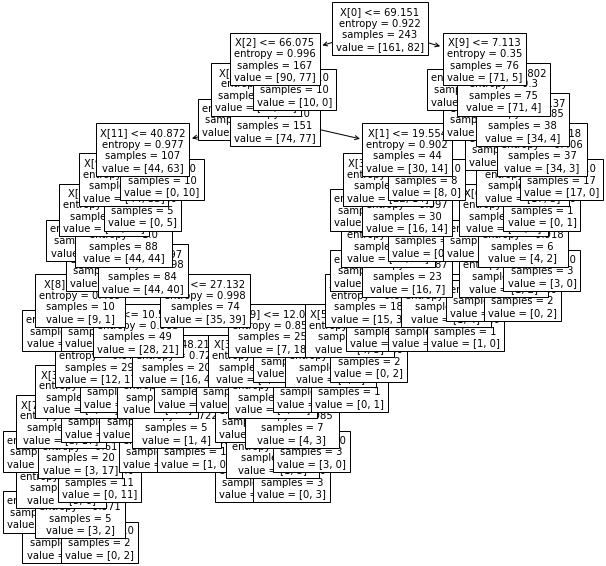

In [53]:
fig,ax=plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()